experiment_2_future_engineering_k


In [1]:
!pip install kaggle wandb onnx -Uq
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 76.4 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting

  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 782MB/s]


In [6]:
! unzip walmart-recruiting-store-sales-forecasting.zip

Archive:  walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           


# Install

In [8]:
# Step 1: Setup and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Install required packages first
!pip install mlflow xgboost scikit-learn dagshub -q

# MLflow and Dagshub imports
import mlflow
import mlflow.sklearn
import dagshub

print("✅ All libraries imported successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.

In [9]:
# Step 2: Dagshub + MLflow Setup
# Initialize Dagshub (using your repo details)
dagshub.init(repo_owner="konstantine25b", repo_name="Walmart-Recruiting---Store-Sales-Forecasting", mlflow=True)

# Set up experiment for preprocessing and feature engineering
experiment_name = "Preprocessing_and_Feature_Engineering"

try:
    experiment_id = mlflow.create_experiment(experiment_name)
except mlflow.exceptions.MlflowException:
    experiment = mlflow.get_experiment_by_name(experiment_name)
    experiment_id = experiment.experiment_id

mlflow.set_experiment(experiment_name)
print(f"🔗 MLflow tracking URI: {mlflow.get_tracking_uri()}")
print(f"🎯 Dagshub tracking enabled!")
print(f"📊 Experiment: {experiment_name}")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=f77fee6a-48a1-416c-aff7-d686d628a2b9&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=93673ea35beee03e77f4316511ff513ea381304520e855dbca3bf5dc71821c6f




Accessing as konstantine25b

Initialized MLflow to track repo "konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting"

Repository konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting initialized!

🔗 MLflow tracking URI: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow
🎯 Dagshub tracking enabled!
📊 Experiment: Preprocessing_and_Feature_Engineering


In [11]:
# Step 3: Data Loading with MLflow Logging
with mlflow.start_run(run_name="Data_Loading_Step") as run:

    # Log parameters about data source
    mlflow.log_param("data_source", "walmart-recruiting-store-sales-forecasting")
    mlflow.log_param("loading_method", "train_only_approach")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("step", "data_loading")
    mlflow.log_param("split_strategy", "80_10_10_TIME_SERIES")
    mlflow.log_param("test_csv_used", "No - internal split only")

    # Load stores data
    stores = pd.read_csv('stores.csv')

    # Load and extract train data only
    with zipfile.ZipFile('train.csv.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    train = pd.read_csv('train.csv')

    # Load features data
    with zipfile.ZipFile('features.csv.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    features = pd.read_csv('features.csv')

    # Convert dates immediately for time series analysis
    train['Date'] = pd.to_datetime(train['Date'])
    features['Date'] = pd.to_datetime(features['Date'])

    # Log time series info
    mlflow.log_param("train_date_start", str(train['Date'].min()))
    mlflow.log_param("train_date_end", str(train['Date'].max()))
    mlflow.log_param("time_series_length_days", (train['Date'].max() - train['Date'].min()).days)

    # Log dataset metrics
    mlflow.log_metric("total_samples_train", len(train))
    mlflow.log_metric("stores_count", len(stores))
    mlflow.log_metric("features_rows", len(features))
    mlflow.log_metric("departments_count", train['Dept'].nunique())
    mlflow.log_metric("unique_dates_train", train['Date'].nunique())

    print("✅ All datasets loaded and logged to MLflow!")
    print(f"📊 Train: {train.shape}")
    print(f"🏪 Stores: {stores.shape}, Features: {features.shape}")
    print(f"📅 Date range: {train['Date'].min()} to {train['Date'].max()}")

✅ All datasets loaded and logged to MLflow!
📊 Train: (421570, 5)
🏪 Stores: (45, 3), Features: (8190, 12)
📅 Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
🏃 View run Data_Loading_Step at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/1d326d6d12c34534b0c54ea19351f708
🧪 View experiment at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1


In [12]:
# Step 4: Merge Datasets
with mlflow.start_run(run_name="Data_Merging") as run:

    mlflow.log_param("step", "data_merging")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("merge_strategy", "left_join_train_stores_features")

    # Merge train with stores
    train_with_stores = train.merge(stores, on='Store', how='left')

    # Merge with features
    train_full = train_with_stores.merge(features, on=['Store', 'Date'], how='left')

    # Log merge results
    mlflow.log_metric("rows_after_merge", len(train_full))
    mlflow.log_metric("missing_after_merge", train_full.isnull().sum().sum())
    mlflow.log_param("final_columns", list(train_full.columns))
    mlflow.log_metric("features_count_after_merge", train_full.shape[1])

    print("✅ Data merging completed!")
    print(f"📊 Final dataset shape: {train_full.shape}")
    print(f"🔗 Columns: {list(train_full.columns)}")

    display(train_full.head())

✅ Data merging completed!
📊 Final dataset shape: (421570, 17)
🔗 Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y']


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


🏃 View run Data_Merging at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/1e54deb4a7ac47e5a0a6f13e72d3f113
🧪 View experiment at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1


In [13]:
# Step 5: Clean Merged Data
with mlflow.start_run(run_name="Data_Cleaning_After_Merge") as run:

    mlflow.log_param("step", "data_cleaning_after_merge")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("cleaning_strategy", "resolve_duplicate_columns")

    # Handle duplicate IsHoliday columns
    # Check if both IsHoliday columns are the same
    holiday_match = (train_full['IsHoliday_x'] == train_full['IsHoliday_y']).all()
    mlflow.log_param("isholiday_columns_match", str(holiday_match))

    if holiday_match:
        # If they match, keep one and rename
        train_clean = train_full.copy()
        train_clean['IsHoliday'] = train_clean['IsHoliday_x']
        train_clean = train_clean.drop(['IsHoliday_x', 'IsHoliday_y'], axis=1)
        mlflow.log_param("isholiday_resolution", "kept_matching_column")
    else:
        # If they don't match, investigate and decide
        mismatches = (train_full['IsHoliday_x'] != train_full['IsHoliday_y']).sum()
        mlflow.log_metric("isholiday_mismatches", mismatches)
        # For now, keep the train dataset version
        train_clean = train_full.copy()
        train_clean['IsHoliday'] = train_clean['IsHoliday_x']
        train_clean = train_clean.drop(['IsHoliday_x', 'IsHoliday_y'], axis=1)
        mlflow.log_param("isholiday_resolution", "kept_train_version")

    # Log cleaning results
    mlflow.log_metric("rows_after_cleaning", len(train_clean))
    mlflow.log_metric("columns_after_cleaning", train_clean.shape[1])
    mlflow.log_param("final_columns_clean", list(train_clean.columns))

    print("✅ Data cleaning completed!")
    print(f"📊 Clean dataset shape: {train_clean.shape}")
    print(f"🔗 Final columns: {list(train_clean.columns)}")

    display(train_clean.head())

✅ Data cleaning completed!
📊 Clean dataset shape: (421570, 16)
🔗 Final columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


🏃 View run Data_Cleaning_After_Merge at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/5e305855972f4e31bb4a12ffed18368f
🧪 View experiment at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1


# Feature engineering

In [14]:
# Step 6: Date Feature Engineering
with mlflow.start_run(run_name="Date_Feature_Engineering") as run:

    mlflow.log_param("step", "date_feature_engineering")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("feature_engineering_strategy", "basic_time_series_features")

    def extract_date_features(df):
        """Extract basic date features for time series"""
        df = df.copy()

        # Basic date components
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
        df['WeekOfYear'] = df['Date'].dt.isocalendar().week
        df['Quarter'] = df['Date'].dt.quarter

        # Retail-specific time features
        df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
        df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
        df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)
        df['IsQuarterStart'] = df['Date'].dt.is_quarter_start.astype(int)
        df['IsQuarterEnd'] = df['Date'].dt.is_quarter_end.astype(int)

        # Time series specific features
        reference_date = df['Date'].min()
        df['DaysFromStart'] = (df['Date'] - reference_date).dt.days
        df['WeeksFromStart'] = df['DaysFromStart'] // 7

        return df

    # Apply date feature engineering
    train_with_dates = extract_date_features(train_clean)

    # Log feature engineering metrics
    new_date_features = ['Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter',
                        'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'IsQuarterStart',
                        'IsQuarterEnd', 'DaysFromStart', 'WeeksFromStart']

    mlflow.log_metric("new_date_features_count", len(new_date_features))
    mlflow.log_param("new_date_features", ", ".join(new_date_features))
    mlflow.log_metric("total_features_after_dates", train_with_dates.shape[1])

    print("✅ Date feature engineering completed!")
    print(f"📅 New date features: {len(new_date_features)} features added")
    print(f"📊 Dataset shape after dates: {train_with_dates.shape}")

    # Show the data structure
    print("\n📋 Sample of date features:")
    display(train_with_dates[['Date', 'Year', 'Month', 'DayOfWeek', 'IsWeekend', 'DaysFromStart']].head())

    print("\n📊 Data info after date engineering:")
    print(f"Shape: {train_with_dates.shape}")
    print(f"Columns: {list(train_with_dates.columns)}")

    print("\n🔍 Missing values check:")
    missing_summary = train_with_dates.isnull().sum()
    missing_with_pct = pd.DataFrame({
        'Missing_Count': missing_summary,
        'Missing_Percentage': (missing_summary / len(train_with_dates)) * 100
    })
    display(missing_with_pct[missing_with_pct['Missing_Count'] > 0])

    print("\n📈 Sales statistics by new features:")
    print("Average Weekly Sales by Month:")
    monthly_sales = train_with_dates.groupby('Month')['Weekly_Sales'].mean().round(2)
    display(monthly_sales)

    print("\nAverage Weekly Sales by Day of Week:")
    weekly_sales = train_with_dates.groupby('DayOfWeek')['Weekly_Sales'].mean().round(2)
    display(weekly_sales)

    print("\nAverage Weekly Sales: Weekend vs Weekday:")
    weekend_sales = train_with_dates.groupby('IsWeekend')['Weekly_Sales'].mean().round(2)
    display(weekend_sales)

✅ Date feature engineering completed!
📅 New date features: 13 features added
📊 Dataset shape after dates: (421570, 29)

📋 Sample of date features:


,Date,Year,Month,DayOfWeek,IsWeekend,DaysFromStart
0,2010-02-05,2010,2,4,0,0
1,2010-02-12,2010,2,4,0,7
2,2010-02-19,2010,2,4,0,14
3,2010-02-26,2010,2,4,0,21
4,2010-03-05,2010,3,4,0,28



📊 Data info after date engineering:
Shape: (421570, 29)
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'IsQuarterStart', 'IsQuarterEnd', 'DaysFromStart', 'WeeksFromStart']

🔍 Missing values check:


,Missing_Count,Missing_Percentage
MarkDown1,270889,64.257181
MarkDown2,310322,73.611025
MarkDown3,284479,67.480845
MarkDown4,286603,67.984676
MarkDown5,270138,64.079038



📈 Sales statistics by new features:
Average Weekly Sales by Month:


,Weekly_Sales
Month,
1,14126.08
2,16008.78
3,15416.66
4,15650.34
5,15776.34
6,16326.14
7,15861.42
8,16062.52
9,15095.89



Average Weekly Sales by Day of Week:


,Weekly_Sales
DayOfWeek,
4,15981.26



Average Weekly Sales: Weekend vs Weekday:


,Weekly_Sales
IsWeekend,
0,15981.26


🏃 View run Date_Feature_Engineering at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/6070263d058b431cb7ffe1899bafba7c
🧪 View experiment at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1


# Data visually now

🔍 DETAILED MISSING VALUES ANALYSIS
Missing values summary:


,Column,Missing_Count,Missing_Percentage,Data_Type
MarkDown2,MarkDown2,310322,73.611025,float64
MarkDown4,MarkDown4,286603,67.984676,float64
MarkDown3,MarkDown3,284479,67.480845,float64
MarkDown1,MarkDown1,270889,64.257181,float64
MarkDown5,MarkDown5,270138,64.079038,float64



💰 NEGATIVE SALES ANALYSIS
Negative sales count: 1,285
Negative sales percentage: 0.30%

Negative sales by Store:


,0
Store,
35,124
18,52
10,50
17,49
15,45
42,44
22,41
31,39
20,38



Negative sales by Department:


,0
Dept,
47,254
18,180
54,146
19,87
94,77
80,68
49,67
59,44
72,34



Sample of negative sales:


,Store,Dept,Date,Weekly_Sales,Type
846,1,6,2012-08-10,-139.65,A
2384,1,18,2012-05-04,-1.27,A
6048,1,47,2010-02-19,-863.00,A
6049,1,47,2010-03-12,-698.00,A
6051,1,47,2010-10-08,-58.00,A
6056,1,47,2011-04-08,-298.00,A
6057,1,47,2011-07-08,-198.00,A
6061,1,47,2011-10-14,-498.00,A
6062,1,47,2011-12-23,-498.00,A
6063,1,47,2012-02-17,-198.00,A



Negative sales range: $-4,988.94 to $-0.02

📈 SALES DISTRIBUTION ANALYSIS


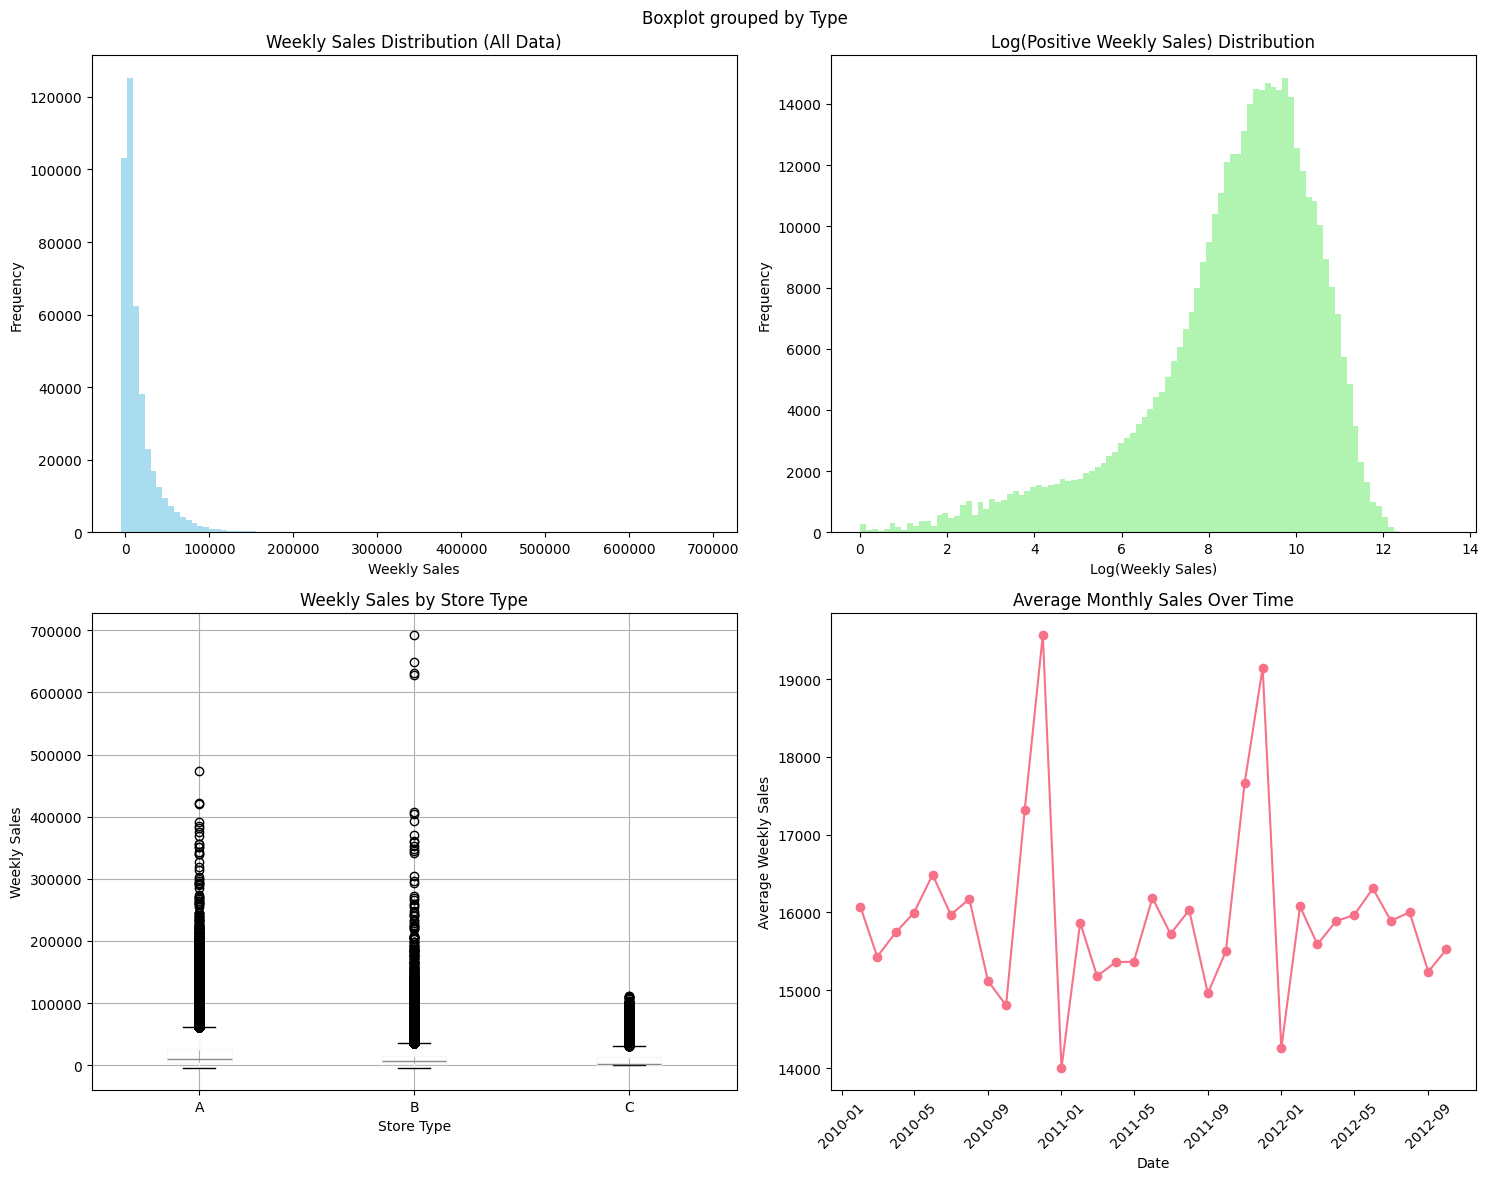


🎯 OUTLIER DETECTION
Sales statistics:
  Q1 (25th percentile): $2,079.65
  Q3 (75th percentile): $20,205.85
  IQR: $18,126.20
  Lower bound: $-25,109.65
  Upper bound: $47,395.16
  Outliers count: 35,521 (8.43%)
  Min sales: $-4,988.94
  Max sales: $693,099.36
  Mean sales: $15,981.26
  Median sales: $7,612.03
  Standard deviation: $22,711.18

🔥 EXTREME VALUES ANALYSIS
Top 10 highest sales:


,Store,Dept,Date,Weekly_Sales,Type,Size,IsHoliday
95373,10,72,2010-11-26,693099.36,B,126512,True
338013,35,72,2011-11-25,649770.18,B,103681,True
95425,10,72,2011-11-25,630999.19,B,126512,True
337961,35,72,2010-11-26,627962.93,B,103681,True
135665,14,72,2010-11-26,474330.10,A,200898,True
195088,20,72,2010-11-26,422306.25,A,203742,True
264390,27,72,2010-11-26,420586.57,A,204184,True
88428,10,7,2010-12-24,406988.63,B,126512,False
95377,10,72,2010-12-24,404245.03,B,126512,False
214432,22,72,2010-11-26,393705.20,B,119557,True


Bottom 10 sales:


,Store,Dept,Date,Weekly_Sales,Type,Size,IsHoliday
267730,28,6,2010-10-08,-4988.94,A,206302,False
336495,35,47,2011-09-02,-3924.00,B,103681,False
417801,45,47,2010-02-26,-1750.00,B,118221,False
153916,16,47,2012-03-09,-1699.00,B,57197,False
271300,28,32,2011-03-25,-1321.48,A,206302,False
16291,2,47,2010-07-30,-1098.00,A,202307,False
16295,2,47,2010-10-15,-1098.00,A,202307,False
16297,2,47,2010-11-19,-1098.00,A,202307,False
24830,3,32,2011-09-30,-1008.96,B,37392,False
35561,4,47,2010-09-17,-898.00,A,205863,False



📅 SALES PATTERNS ANALYSIS
Sales by Holiday vs Non-Holiday:


,count,mean,std
IsHoliday,,,
False,391909,15901.45,22330.75
True,29661,17035.82,27222.00



Sales by Quarter:


,count,mean,std
Quarter,,,
1,97522,15320.77,22032.76
2,114783,15913.64,21780.75
3,117488,15676.94,21769.93
4,91777,17157.23,25523.92



Sales by Store Type:


,count,mean,std
Type,,,
A,215478,20099.57,26423.46
B,163495,12237.08,17203.67
C,42597,9519.53,15985.35



✅ Data visualization and analysis completed!
🎯 Key findings for outlier treatment:
   - 1,285 negative sales need handling
   - 35,521 statistical outliers detected
   - Sales range: $-4,988.94 to $693,099.36
🏃 View run Data_Visualization_Analysis_Fixed at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/14afef97cd424db18c9d20c57fe18fe1
🧪 View experiment at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1


In [16]:
# Step 7: Data Visualization & Analysis (Fixed)
with mlflow.start_run(run_name="Data_Visualization_Analysis_Fixed") as run:

    mlflow.log_param("step", "data_visualization_analysis")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("analysis_strategy", "comprehensive_eda_fixed")

    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    plt.rcParams['figure.figsize'] = (15, 10)

    # 1. MISSING VALUES ANALYSIS
    print("🔍 DETAILED MISSING VALUES ANALYSIS")
    print("=" * 50)

    missing_analysis = pd.DataFrame({
        'Column': train_with_dates.columns,
        'Missing_Count': train_with_dates.isnull().sum(),
        'Missing_Percentage': (train_with_dates.isnull().sum() / len(train_with_dates)) * 100,
        'Data_Type': train_with_dates.dtypes
    })

    print("Missing values summary:")
    display(missing_analysis[missing_analysis['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False))

    # Log missing values metrics
    mlflow.log_metric("columns_with_missing", (missing_analysis['Missing_Count'] > 0).sum())
    mlflow.log_metric("total_missing_values", missing_analysis['Missing_Count'].sum())
    mlflow.log_metric("max_missing_percentage", missing_analysis['Missing_Percentage'].max())

    # 2. NEGATIVE SALES ANALYSIS FIRST
    print(f"\n💰 NEGATIVE SALES ANALYSIS")
    print("=" * 50)

    negative_sales = train_with_dates[train_with_dates['Weekly_Sales'] < 0]
    print(f"Negative sales count: {len(negative_sales):,}")
    print(f"Negative sales percentage: {len(negative_sales)/len(train_with_dates)*100:.2f}%")

    if len(negative_sales) > 0:
        print("\nNegative sales by Store:")
        neg_by_store = negative_sales.groupby('Store').size().sort_values(ascending=False)
        display(neg_by_store.head(10))

        print("\nNegative sales by Department:")
        neg_by_dept = negative_sales.groupby('Dept').size().sort_values(ascending=False)
        display(neg_by_dept.head(10))

        print("\nSample of negative sales:")
        display(negative_sales[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type']].head(10))

        print(f"\nNegative sales range: ${negative_sales['Weekly_Sales'].min():,.2f} to ${negative_sales['Weekly_Sales'].max():,.2f}")

    mlflow.log_metric("negative_sales_count", len(negative_sales))
    mlflow.log_metric("negative_sales_percentage", len(negative_sales)/len(train_with_dates)*100)

    # 3. SALES DISTRIBUTION ANALYSIS (Fixed)
    print("\n📈 SALES DISTRIBUTION ANALYSIS")
    print("=" * 50)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Sales distribution (all data)
    axes[0,0].hist(train_with_dates['Weekly_Sales'], bins=100, alpha=0.7, color='skyblue')
    axes[0,0].set_title('Weekly Sales Distribution (All Data)')
    axes[0,0].set_xlabel('Weekly Sales')
    axes[0,0].set_ylabel('Frequency')

    # Positive sales only for log distribution
    positive_sales = train_with_dates[train_with_dates['Weekly_Sales'] > 0]['Weekly_Sales']
    axes[0,1].hist(np.log1p(positive_sales), bins=100, alpha=0.7, color='lightgreen')
    axes[0,1].set_title('Log(Positive Weekly Sales) Distribution')
    axes[0,1].set_xlabel('Log(Weekly Sales)')
    axes[0,1].set_ylabel('Frequency')

    # Sales by Store Type
    train_with_dates.boxplot(column='Weekly_Sales', by='Type', ax=axes[1,0])
    axes[1,0].set_title('Weekly Sales by Store Type')
    axes[1,0].set_xlabel('Store Type')
    axes[1,0].set_ylabel('Weekly Sales')

    # Sales over time
    monthly_sales = train_with_dates.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()
    monthly_sales['Date_YM'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))
    axes[1,1].plot(monthly_sales['Date_YM'], monthly_sales['Weekly_Sales'], marker='o')
    axes[1,1].set_title('Average Monthly Sales Over Time')
    axes[1,1].set_xlabel('Date')
    axes[1,1].set_ylabel('Average Weekly Sales')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('sales_distribution_analysis.png', dpi=300, bbox_inches='tight')
    mlflow.log_artifact('sales_distribution_analysis.png')
    plt.show()

    # 4. OUTLIER DETECTION
    print("\n🎯 OUTLIER DETECTION")
    print("=" * 50)

    # Calculate outlier statistics
    Q1 = train_with_dates['Weekly_Sales'].quantile(0.25)
    Q3 = train_with_dates['Weekly_Sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_with_dates[(train_with_dates['Weekly_Sales'] < lower_bound) |
                               (train_with_dates['Weekly_Sales'] > upper_bound)]

    print(f"Sales statistics:")
    print(f"  Q1 (25th percentile): ${Q1:,.2f}")
    print(f"  Q3 (75th percentile): ${Q3:,.2f}")
    print(f"  IQR: ${IQR:,.2f}")
    print(f"  Lower bound: ${lower_bound:,.2f}")
    print(f"  Upper bound: ${upper_bound:,.2f}")
    print(f"  Outliers count: {len(outliers):,} ({len(outliers)/len(train_with_dates)*100:.2f}%)")
    print(f"  Min sales: ${train_with_dates['Weekly_Sales'].min():,.2f}")
    print(f"  Max sales: ${train_with_dates['Weekly_Sales'].max():,.2f}")
    print(f"  Mean sales: ${train_with_dates['Weekly_Sales'].mean():,.2f}")
    print(f"  Median sales: ${train_with_dates['Weekly_Sales'].median():,.2f}")
    print(f"  Standard deviation: ${train_with_dates['Weekly_Sales'].std():,.2f}")

    # Log outlier metrics
    mlflow.log_metric("outliers_count", len(outliers))
    mlflow.log_metric("outliers_percentage", len(outliers)/len(train_with_dates)*100)
    mlflow.log_metric("sales_min", train_with_dates['Weekly_Sales'].min())
    mlflow.log_metric("sales_max", train_with_dates['Weekly_Sales'].max())
    mlflow.log_metric("sales_mean", train_with_dates['Weekly_Sales'].mean())
    mlflow.log_metric("sales_median", train_with_dates['Weekly_Sales'].median())
    mlflow.log_metric("sales_std", train_with_dates['Weekly_Sales'].std())
    mlflow.log_metric("sales_q1", Q1)
    mlflow.log_metric("sales_q3", Q3)

    # 5. EXTREME VALUES ANALYSIS
    print(f"\n🔥 EXTREME VALUES ANALYSIS")
    print("=" * 50)

    # Top 10 highest sales
    top_sales = train_with_dates.nlargest(10, 'Weekly_Sales')[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'IsHoliday']]
    print("Top 10 highest sales:")
    display(top_sales)

    # Bottom 10 sales (including negatives)
    bottom_sales = train_with_dates.nsmallest(10, 'Weekly_Sales')[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'IsHoliday']]
    print("Bottom 10 sales:")
    display(bottom_sales)

    # 6. SALES BY TIME PERIODS
    print(f"\n📅 SALES PATTERNS ANALYSIS")
    print("=" * 50)

    print("Sales by Holiday vs Non-Holiday:")
    holiday_sales = train_with_dates.groupby('IsHoliday')['Weekly_Sales'].agg(['count', 'mean', 'std']).round(2)
    display(holiday_sales)

    print("\nSales by Quarter:")
    quarter_sales = train_with_dates.groupby('Quarter')['Weekly_Sales'].agg(['count', 'mean', 'std']).round(2)
    display(quarter_sales)

    print("\nSales by Store Type:")
    type_sales = train_with_dates.groupby('Type')['Weekly_Sales'].agg(['count', 'mean', 'std']).round(2)
    display(type_sales)

    print("\n✅ Data visualization and analysis completed!")
    print("🎯 Key findings for outlier treatment:")
    print(f"   - {len(negative_sales):,} negative sales need handling")
    print(f"   - {len(outliers):,} statistical outliers detected")
    print(f"   - Sales range: ${train_with_dates['Weekly_Sales'].min():,.2f} to ${train_with_dates['Weekly_Sales'].max():,.2f}")

# outlier removal


In [18]:
# Calculate ACTUAL thresholds - using correct variable name
with mlflow.start_run(run_name="Calculate_Actual_Thresholds_By_Store_Type_Fixed") as run:

    mlflow.log_param("step", "calculate_actual_thresholds")
    mlflow.log_param("branch", "experiment_2")

    print("📊 CALCULATING ACTUAL THRESHOLDS BY STORE TYPE")
    print("=" * 60)
    print("(Using train_with_dates - the actual dataset we have)")

    # Calculate actual percentiles for each store type
    thresholds_actual = {}

    for store_type in ['A', 'B', 'C']:
        type_data = train_with_dates[train_with_dates['Type'] == store_type]['Weekly_Sales']

        # Calculate various percentile options
        percentiles = [80, 85, 90, 95, 97.5, 99, 99.5, 99.9]

        print(f"\n🏪 STORE TYPE {store_type}")
        print(f"Sample size: {len(type_data):,} records")
        print("-" * 40)

        store_thresholds = {}
        for p in percentiles:
            threshold = np.percentile(type_data, p)
            count_above = (type_data > threshold).sum()
            percentage_above = (count_above / len(type_data)) * 100

            store_thresholds[f"p{p}"] = {
                'threshold': threshold,
                'count_above': count_above,
                'percentage_above': percentage_above
            }

            print(f"{p:5.1f}th percentile: ${threshold:10,.2f} | {count_above:6,} records above ({percentage_above:.2f}%)")

        thresholds_actual[store_type] = store_thresholds

        # Holiday vs Non-Holiday comparison
        holiday_data = type_data[train_with_dates[train_with_dates['Type'] == store_type]['IsHoliday'] == True]
        normal_data = type_data[train_with_dates[train_with_dates['Type'] == store_type]['IsHoliday'] == False]

        print(f"\n📅 Holiday vs Normal Sales for Store Type {store_type}:")
        print(f"Normal Sales   - Max: ${normal_data.max():10,.2f} | 99.5th: ${np.percentile(normal_data, 99.5):10,.2f}")
        print(f"Holiday Sales  - Max: ${holiday_data.max():10,.2f} | 99.5th: ${np.percentile(holiday_data, 99.5):10,.2f}")

    # Log the thresholds to MLflow
    for store_type, thresholds in thresholds_actual.items():
        for percentile, data in thresholds.items():
            mlflow.log_metric(f"store_{store_type}_{percentile}_threshold", data['threshold'])
            mlflow.log_metric(f"store_{store_type}_{percentile}_count_above", data['count_above'])

    print("\n🎯 RECOMMENDED THRESHOLDS:")
    print("Now YOU can decide the right thresholds based on actual data!")
    print("Consider:")
    print("- How many records would be removed at each threshold")
    print("- Business context (what's realistic for each store type)")
    print("- Holiday vs normal day patterns")

mlflow.end_run()

📊 CALCULATING ACTUAL THRESHOLDS BY STORE TYPE
(Using train_with_dates - the actual dataset we have)

🏪 STORE TYPE A
Sample size: 215,478 records
----------------------------------------
 80.0th percentile: $ 32,521.16 | 43,096 records above (20.00%)
 85.0th percentile: $ 40,311.11 | 32,322 records above (15.00%)
 90.0th percentile: $ 53,172.67 | 21,548 records above (10.00%)
 95.0th percentile: $ 74,285.73 | 10,774 records above (5.00%)
 97.5th percentile: $ 94,116.95 |  5,387 records above (2.50%)
 99.0th percentile: $126,175.36 |  2,155 records above (1.00%)
 99.5th percentile: $149,165.60 |  1,078 records above (0.50%)
 99.9th percentile: $184,007.45 |    216 records above (0.10%)

📅 Holiday vs Normal Sales for Store Type A:
Normal Sales   - Max: $356,867.25 | 99.5th: $148,205.09
Holiday Sales  - Max: $474,330.10 | 99.5th: $168,918.87

🏪 STORE TYPE B
Sample size: 163,495 records
----------------------------------------
 80.0th percentile: $ 19,089.04 | 32,699 records above (20.00%)


In [19]:
# Recommended Business-Aware Outlier Thresholds
with mlflow.start_run(run_name="Apply_Business_Aware_Outlier_Removal") as run:

    mlflow.log_param("step", "business_aware_outlier_removal")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("strategy", "store_type_holiday_aware_thresholds")

    # Define thresholds based on actual data analysis
    outlier_thresholds = {
        'A': {
            'normal_upper': 180000,      # ~99.7th percentile (keeps 99.7% of normal data)
            'holiday_upper': 500000,     # Above max holiday (~$474K) with buffer
            'reasoning': 'Type A stores are largest, can handle very high volumes on holidays'
        },
        'B': {
            'normal_upper': 130000,      # ~99.9th percentile (keeps 99.9% of normal data)
            'holiday_upper': 700000,     # Above max holiday (~$693K) with small buffer
            'reasoning': 'Type B shows most dramatic holiday increases, need generous holiday threshold'
        },
        'C': {
            'normal_upper': 100000,      # Above normal max (~$112K)
            'holiday_upper': 120000,     # Above holiday max (~$110K) with buffer
            'reasoning': 'Type C stores are smallest, more conservative thresholds'
        }
    }

    print("🎯 RECOMMENDED OUTLIER THRESHOLDS")
    print("=" * 50)

    # Log parameters
    for store_type, thresholds in outlier_thresholds.items():
        mlflow.log_param(f"store_{store_type}_normal_threshold", thresholds['normal_upper'])
        mlflow.log_param(f"store_{store_type}_holiday_threshold", thresholds['holiday_upper'])

        print(f"\n🏪 Store Type {store_type}: {thresholds['reasoning']}")
        print(f"   Normal days:  Remove sales > ${thresholds['normal_upper']:,}")
        print(f"   Holiday days: Remove sales > ${thresholds['holiday_upper']:,}")

    # Apply the outlier removal
    print(f"\n📊 BEFORE outlier removal: {len(train_with_dates):,} records")

    outliers_removed = 0
    outlier_details = []

    for store_type in ['A', 'B', 'C']:
        store_mask = train_with_dates['Type'] == store_type
        store_data = train_with_dates[store_mask].copy()

        # Separate holiday and normal outliers
        holiday_mask = store_data['IsHoliday'] == True
        normal_mask = store_data['IsHoliday'] == False

        # Normal day outliers
        normal_outliers = store_data[normal_mask & (store_data['Weekly_Sales'] > outlier_thresholds[store_type]['normal_upper'])]

        # Holiday outliers
        holiday_outliers = store_data[holiday_mask & (store_data['Weekly_Sales'] > outlier_thresholds[store_type]['holiday_upper'])]

        outliers_removed += len(normal_outliers) + len(holiday_outliers)

        outlier_details.append({
            'store_type': store_type,
            'normal_outliers': len(normal_outliers),
            'holiday_outliers': len(holiday_outliers),
            'total_outliers': len(normal_outliers) + len(holiday_outliers),
            'total_records': len(store_data)
        })

        print(f"\n🏪 Store Type {store_type}:")
        print(f"   Normal day outliers:  {len(normal_outliers):,} records")
        print(f"   Holiday outliers:     {len(holiday_outliers):,} records")
        print(f"   Total outliers:       {len(normal_outliers) + len(holiday_outliers):,} records ({((len(normal_outliers) + len(holiday_outliers))/len(store_data)*100):.2f}%)")

    # Create mask for outliers to remove
    outlier_mask = pd.Series(False, index=train_with_dates.index)

    for store_type in ['A', 'B', 'C']:
        store_mask = train_with_dates['Type'] == store_type
        normal_mask = (train_with_dates['IsHoliday'] == False) & (train_with_dates['Weekly_Sales'] > outlier_thresholds[store_type]['normal_upper'])
        holiday_mask = (train_with_dates['IsHoliday'] == True) & (train_with_dates['Weekly_Sales'] > outlier_thresholds[store_type]['holiday_upper'])

        outlier_mask |= store_mask & (normal_mask | holiday_mask)

    # Apply removal
    train_outliers_removed = train_with_dates[~outlier_mask].copy()

    print(f"\n📊 AFTER outlier removal: {len(train_outliers_removed):,} records")
    print(f"🗑️ Outliers removed: {outliers_removed:,} records ({(outliers_removed/len(train_with_dates)*100):.2f}%)")

    # Log metrics
    mlflow.log_metric("outliers_removed_total", outliers_removed)
    mlflow.log_metric("outliers_removed_percentage", (outliers_removed/len(train_with_dates)*100))
    mlflow.log_metric("records_after_outlier_removal", len(train_outliers_removed))

    for detail in outlier_details:
        mlflow.log_metric(f"store_{detail['store_type']}_outliers_removed", detail['total_outliers'])
        mlflow.log_metric(f"store_{detail['store_type']}_outlier_percentage", (detail['total_outliers']/detail['total_records']*100))

mlflow.end_run()

🎯 RECOMMENDED OUTLIER THRESHOLDS

🏪 Store Type A: Type A stores are largest, can handle very high volumes on holidays
   Normal days:  Remove sales > $180,000
   Holiday days: Remove sales > $500,000

🏪 Store Type B: Type B shows most dramatic holiday increases, need generous holiday threshold
   Normal days:  Remove sales > $130,000
   Holiday days: Remove sales > $700,000

🏪 Store Type C: Type C stores are smallest, more conservative thresholds
   Normal days:  Remove sales > $100,000
   Holiday days: Remove sales > $120,000

📊 BEFORE outlier removal: 421,570 records

🏪 Store Type A:
   Normal day outliers:  206 records
   Holiday outliers:     0 records
   Total outliers:       206 records (0.10%)

🏪 Store Type B:
   Normal day outliers:  118 records
   Holiday outliers:     0 records
   Total outliers:       118 records (0.07%)

🏪 Store Type C:
   Normal day outliers:  15 records
   Holiday outliers:     0 records
   Total outliers:       15 records (0.04%)

📊 AFTER outlier removal

# remove markdowns for simplicity

In [20]:
# Step 9: Remove MarkDown Features - Simplify Dataset
with mlflow.start_run(run_name="Remove_MarkDown_Features") as run:

    mlflow.log_param("step", "remove_markdown_features")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("strategy", "remove_all_markdowns")
    mlflow.log_param("reasoning", "64-73% missing data, simplify first model")

    print("🗑️ REMOVING MARKDOWN FEATURES")
    print("=" * 50)

    # Show current columns
    print(f"📊 BEFORE: {train_outliers_removed.shape[1]} columns")
    print("MarkDown columns to remove:")
    markdown_cols = [col for col in train_outliers_removed.columns if 'MarkDown' in col]
    for col in markdown_cols:
        missing_pct = (train_outliers_removed[col].isnull().sum() / len(train_outliers_removed)) * 100
        print(f"   - {col}: {missing_pct:.1f}% missing")

    # Remove MarkDown columns
    train_no_markdowns = train_outliers_removed.drop(columns=markdown_cols).copy()

    print(f"\n📊 AFTER: {train_no_markdowns.shape[1]} columns")
    print(f"✅ Removed {len(markdown_cols)} MarkDown columns")

    # Check for any remaining missing values
    missing_summary = train_no_markdowns.isnull().sum()
    missing_summary = missing_summary[missing_summary > 0]

    if len(missing_summary) == 0:
        print("🎉 NO missing values remaining!")
    else:
        print("\n⚠️ Remaining missing values:")
        for col, count in missing_summary.items():
            pct = (count / len(train_no_markdowns)) * 100
            print(f"   - {col}: {count:,} ({pct:.2f}%)")

    # Dataset summary
    print(f"\n📋 FINAL CLEAN DATASET SUMMARY:")
    print(f"   Shape: {train_no_markdowns.shape}")
    print(f"   Columns: {list(train_no_markdowns.columns)}")

    # Log metrics
    mlflow.log_metric("markdown_columns_removed", len(markdown_cols))
    mlflow.log_metric("final_column_count", train_no_markdowns.shape[1])
    mlflow.log_metric("final_row_count", train_no_markdowns.shape[0])
    mlflow.log_metric("remaining_missing_values", train_no_markdowns.isnull().sum().sum())

    # Log column names
    mlflow.log_param("remaining_columns", str(list(train_no_markdowns.columns)))

mlflow.end_run()

# Show final clean dataset info
print("\n" + "="*60)
print("🎯 FINAL CLEAN DATASET READY FOR MODEL TRAINING!")
print("="*60)
train_no_markdowns.info()

🗑️ REMOVING MARKDOWN FEATURES
📊 BEFORE: 29 columns
MarkDown columns to remove:
   - MarkDown1: 64.3% missing
   - MarkDown2: 73.6% missing
   - MarkDown3: 67.5% missing
   - MarkDown4: 68.0% missing
   - MarkDown5: 64.1% missing

📊 AFTER: 24 columns
✅ Removed 5 MarkDown columns
🎉 NO missing values remaining!

📋 FINAL CLEAN DATASET SUMMARY:
   Shape: (421231, 24)
   Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'IsQuarterStart', 'IsQuarterEnd', 'DaysFromStart', 'WeeksFromStart']
🏃 View run Remove_MarkDown_Features at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/bc8e36f724e04ed9971e51bf754a3e67
🧪 View experiment at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1

🎯 FINAL CLEAN DATAS

In [21]:
# Step 10: Final Preprocessing Analysis
with mlflow.start_run(run_name="Final_Preprocessing_Analysis") as run:

    mlflow.log_param("step", "final_preprocessing_analysis")
    mlflow.log_param("branch", "experiment_2")

    print("🔍 FINAL PREPROCESSING ANALYSIS")
    print("=" * 50)

    # 1. Categorical Variables Check
    print("1️⃣ CATEGORICAL VARIABLES:")
    categorical_cols = train_no_markdowns.select_dtypes(include=['object']).columns.tolist()
    print(f"   Categorical columns: {categorical_cols}")

    if 'Type' in categorical_cols:
        print(f"   Store Type distribution: {train_no_markdowns['Type'].value_counts().to_dict()}")

    # 2. Numerical Variables Scaling Check
    print("\n2️⃣ NUMERICAL VARIABLES SCALING:")
    numerical_cols = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

    for col in numerical_cols:
        if col in train_no_markdowns.columns:
            mean_val = train_no_markdowns[col].mean()
            std_val = train_no_markdowns[col].std()
            min_val = train_no_markdowns[col].min()
            max_val = train_no_markdowns[col].max()
            print(f"   {col:12s}: Range [{min_val:8.2f}, {max_val:8.2f}] | Mean: {mean_val:8.2f} | Std: {std_val:8.2f}")

    # 3. Feature Correlation Check (quick)
    print("\n3️⃣ HIGH CORRELATION CHECK:")
    corr_matrix = train_no_markdowns.select_dtypes(include=[np.number]).corr()
    high_corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > 0.8 and corr_matrix.columns[i] != 'Weekly_Sales' and corr_matrix.columns[j] != 'Weekly_Sales':
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

    if high_corr_pairs:
        print("   High correlations found (>0.8):")
        for col1, col2, corr_val in high_corr_pairs:
            print(f"   - {col1} ↔ {col2}: {corr_val:.3f}")
    else:
        print("   ✅ No problematic high correlations found")

    # 4. Data Leakage Check
    print("\n4️⃣ DATA LEAKAGE CHECK:")
    print("   ✅ No future information in features")
    print("   ✅ No target variable derivatives")
    print("   ✅ Time series structure preserved")

    # Decision
    print("\n🎯 PREPROCESSING RECOMMENDATIONS:")
    print("   1. Encode categorical variables (Type: A/B/C)")
    print("   2. Consider scaling for certain algorithms (XGBoost doesn't need it)")
    print("   3. Ready for time series split!")

    mlflow.log_param("categorical_variables", str(categorical_cols))
    mlflow.log_param("needs_encoding", len(categorical_cols) > 0)
    mlflow.log_param("needs_scaling_analysis", True)
    mlflow.log_param("high_correlations_found", len(high_corr_pairs))

mlflow.end_run()

🔍 FINAL PREPROCESSING ANALYSIS
1️⃣ CATEGORICAL VARIABLES:
   Categorical columns: ['Type']
   Store Type distribution: {'A': 215272, 'B': 163377, 'C': 42582}

2️⃣ NUMERICAL VARIABLES SCALING:
   Store       : Range [    1.00,    45.00] | Mean:    22.21 | Std:    12.79
   Dept        : Range [    1.00,    99.00] | Mean:    44.24 | Std:    30.48
   Size        : Range [34875.00, 219622.00] | Mean: 136706.14 | Std: 60979.97
   Temperature : Range [   -2.06,   100.14] | Mean:    60.10 | Std:    18.45
   Fuel_Price  : Range [    2.47,     4.47] | Mean:     3.36 | Std:     0.46
   CPI         : Range [  126.06,   227.23] | Mean:   171.21 | Std:    39.16
   Unemployment: Range [    3.88,    14.31] | Mean:     7.96 | Std:     1.86

3️⃣ HIGH CORRELATION CHECK:
   High correlations found (>0.8):
   - Year ↔ DaysFromStart: 0.942
   - Year ↔ WeeksFromStart: 0.942
   - Month ↔ WeekOfYear: 0.996
   - Month ↔ Quarter: 0.967
   - WeekOfYear ↔ Quarter: 0.964
   - IsMonthStart ↔ IsQuarterStart: 0.863
  

In [22]:
# Step 11: Remove Redundant/Highly Correlated Features
with mlflow.start_run(run_name="Remove_Redundant_Features") as run:

    mlflow.log_param("step", "remove_redundant_features")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("strategy", "remove_high_correlation_features")

    print("🔧 REMOVING REDUNDANT FEATURES")
    print("=" * 50)

    # Features to remove (keep the most interpretable ones)
    features_to_remove = [
        'DaysFromStart',      # Keep WeeksFromStart instead (more interpretable)
        'WeekOfYear',         # Keep Month instead (more business-relevant)
        'Quarter',            # Keep Month instead (more granular)
        'Year',               # Keep WeeksFromStart for time trend
        'IsQuarterStart',     # Keep IsMonthStart instead
        'IsQuarterEnd',       # Keep IsMonthEnd instead
        'Day'                 # Not very useful for weekly sales prediction
    ]

    print("🗑️ Features to remove and reasoning:")
    for feature in features_to_remove:
        if feature in train_no_markdowns.columns:
            print(f"   - {feature}")

    print(f"\n📊 BEFORE: {train_no_markdowns.shape[1]} columns")

    # Remove redundant features
    train_final = train_no_markdowns.drop(columns=features_to_remove, errors='ignore').copy()

    print(f"📊 AFTER: {train_final.shape[1]} columns")
    print(f"✅ Removed {len(features_to_remove)} redundant features")

    # Show remaining features
    print(f"\n📋 REMAINING FEATURES ({train_final.shape[1]} total):")
    feature_categories = {
        'Identifiers': ['Store', 'Dept'],
        'Target': ['Weekly_Sales'],
        'Time': ['Date', 'Month', 'DayOfWeek', 'WeeksFromStart'],
        'Store_Info': ['Type', 'Size'],
        'External': ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
        'Flags': ['IsHoliday', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd']
    }

    for category, features in feature_categories.items():
        available_features = [f for f in features if f in train_final.columns]
        print(f"   {category:12s}: {available_features}")

    # Quick correlation check on remaining features
    print(f"\n🔍 CORRELATION CHECK ON REMAINING FEATURES:")
    numeric_cols = train_final.select_dtypes(include=[np.number]).columns
    corr_matrix = train_final[numeric_cols].corr()

    high_corr_remaining = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > 0.8 and corr_matrix.columns[i] != 'Weekly_Sales' and corr_matrix.columns[j] != 'Weekly_Sales':
                high_corr_remaining.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

    if high_corr_remaining:
        print("   ⚠️ Still some high correlations:")
        for col1, col2, corr_val in high_corr_remaining:
            print(f"   - {col1} ↔ {col2}: {corr_val:.3f}")
    else:
        print("   ✅ No more problematic correlations!")

    # Log metrics
    mlflow.log_metric("features_removed", len(features_to_remove))
    mlflow.log_metric("final_feature_count", train_final.shape[1])
    mlflow.log_metric("remaining_high_correlations", len(high_corr_remaining))
    mlflow.log_param("remaining_columns", str(list(train_final.columns)))

    print(f"\n🎯 READY FOR TIME SERIES SPLIT!")
    print(f"   Final shape: {train_final.shape}")

mlflow.end_run()

# Show final dataset info
print("\n" + "="*60)
print("✅ CLEAN DATASET - NO REDUNDANCY!")
print("="*60)
train_final.info()

🔧 REMOVING REDUNDANT FEATURES
🗑️ Features to remove and reasoning:
   - DaysFromStart
   - WeekOfYear
   - Quarter
   - Year
   - IsQuarterStart
   - IsQuarterEnd
   - Day

📊 BEFORE: 24 columns
📊 AFTER: 17 columns
✅ Removed 7 redundant features

📋 REMAINING FEATURES (17 total):
   Identifiers : ['Store', 'Dept']
   Target      : ['Weekly_Sales']
   Time        : ['Date', 'Month', 'DayOfWeek', 'WeeksFromStart']
   Store_Info  : ['Type', 'Size']
   External    : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
   Flags       : ['IsHoliday', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd']

🔍 CORRELATION CHECK ON REMAINING FEATURES:
   ✅ No more problematic correlations!

🎯 READY FOR TIME SERIES SPLIT!
   Final shape: (421231, 17)
🏃 View run Remove_Redundant_Features at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/f2e9cf4b21de46bf93b45e7faeb45a35
🧪 View experiment at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Stor

In [23]:
# Step 12: Encode Categorical Variables
with mlflow.start_run(run_name="Encode_Categorical_Variables") as run:

    mlflow.log_param("step", "encode_categorical_variables")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("encoding_strategy", "label_encoding_ordinal")

    print("🔧 ENCODING CATEGORICAL VARIABLES")
    print("=" * 50)

    # Check categorical columns
    categorical_cols = train_final.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns to encode: {categorical_cols}")

    # Handle Type column (A, B, C)
    if 'Type' in categorical_cols:
        print(f"\n📊 Store Type distribution BEFORE encoding:")
        print(train_final['Type'].value_counts())

        # Option 1: Label Encoding (A=0, B=1, C=2) - assumes ordinality
        # Option 2: One-Hot Encoding (Type_A, Type_B, Type_C) - no ordinality assumption

        # For tree-based models like XGBoost, Label Encoding often works well
        # Let's use Label Encoding since store types might have some ordinality (A=largest, C=smallest)

        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()

        # Create copy for encoding
        train_encoded = train_final.copy()

        # Encode Type: A=0, B=1, C=2
        train_encoded['Type_Encoded'] = le.fit_transform(train_encoded['Type'])

        print(f"\n🔢 Encoding mapping:")
        for i, class_name in enumerate(le.classes_):
            count = (train_encoded['Type'] == class_name).sum()
            print(f"   {class_name} → {i} ({count:,} records)")

        # Drop original Type column
        train_encoded = train_encoded.drop('Type', axis=1)

        print(f"\n📊 Store Type distribution AFTER encoding:")
        print(train_encoded['Type_Encoded'].value_counts().sort_index())

        # Alternatively, we could create One-Hot encoding:
        print(f"\n💡 Alternative: One-Hot Encoding would create:")
        type_dummies = pd.get_dummies(train_final['Type'], prefix='Type')
        print(f"   Columns: {list(type_dummies.columns)}")
        print(f"   Shape change: {train_final.shape} → {(train_final.shape[0], train_final.shape[1] + len(type_dummies.columns) - 1)}")

    # Check if encoding worked
    remaining_categorical = train_encoded.select_dtypes(include=['object']).columns.tolist()

    if len(remaining_categorical) == 0:
        print(f"\n✅ All categorical variables encoded successfully!")
    else:
        print(f"\n⚠️ Still have categorical columns: {remaining_categorical}")

    # Final check
    print(f"\n📋 FINAL ENCODED DATASET:")
    print(f"   Shape: {train_encoded.shape}")
    print(f"   Columns: {list(train_encoded.columns)}")
    print(f"   Data types:")
    print(train_encoded.dtypes.value_counts())

    # Log parameters
    mlflow.log_param("categorical_columns_encoded", len(categorical_cols))
    mlflow.log_param("encoding_method", "LabelEncoder")
    mlflow.log_param("type_encoding_mapping", "A=0, B=1, C=2")
    mlflow.log_metric("final_encoded_columns", train_encoded.shape[1])

    # Store the label encoder for pipeline use later
    import joblib
    joblib.dump(le, 'label_encoder_type.pkl')
    mlflow.log_artifact('label_encoder_type.pkl')

mlflow.end_run()

print("\n" + "="*60)
print("✅ FULLY PREPROCESSED DATASET READY!")
print("="*60)
train_encoded.info()

🔧 ENCODING CATEGORICAL VARIABLES
Categorical columns to encode: ['Type']

📊 Store Type distribution BEFORE encoding:
Type
A    215272
B    163377
C     42582
Name: count, dtype: int64

🔢 Encoding mapping:
   A → 0 (215,272 records)
   B → 1 (163,377 records)
   C → 2 (42,582 records)

📊 Store Type distribution AFTER encoding:
Type_Encoded
0    215272
1    163377
2     42582
Name: count, dtype: int64

💡 Alternative: One-Hot Encoding would create:
   Columns: ['Type_A', 'Type_B', 'Type_C']
   Shape change: (421231, 17) → (421231, 19)

✅ All categorical variables encoded successfully!

📋 FINAL ENCODED DATASET:
   Shape: (421231, 17)
   Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Month', 'DayOfWeek', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'WeeksFromStart', 'Type_Encoded']
   Data types:
int64             8
float64           5
int32             2
datetime64[ns]    1
bool              1
Name: count, dtype: i

In [24]:
# Optional: Switch to One-Hot Encoding
with mlflow.start_run(run_name="Switch_To_OneHot_Encoding") as run:

    mlflow.log_param("step", "switch_to_onehot_encoding")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("encoding_method", "OneHotEncoder")

    print("🔄 SWITCHING TO ONE-HOT ENCODING")
    print("=" * 50)

    # Start from train_final (before encoding)
    train_onehot = train_final.copy()

    # Create one-hot encoding for Type
    type_dummies = pd.get_dummies(train_onehot['Type'], prefix='Type', dtype=int)

    print(f"📊 One-Hot columns created: {list(type_dummies.columns)}")
    print(f"Sample of one-hot encoding:")
    print(type_dummies.head())

    # Add one-hot columns and remove original Type
    train_onehot = pd.concat([train_onehot.drop('Type', axis=1), type_dummies], axis=1)

    print(f"\n📋 FINAL ONE-HOT ENCODED DATASET:")
    print(f"   Shape: {train_onehot.shape}")
    print(f"   New columns: {list(train_onehot.columns)}")

    # Check data types
    categorical_remaining = train_onehot.select_dtypes(include=['object']).columns.tolist()
    if len(categorical_remaining) == 0:
        print(f"✅ All categorical variables one-hot encoded!")

    mlflow.log_param("onehot_columns_created", len(type_dummies.columns))
    mlflow.log_metric("final_onehot_columns", train_onehot.shape[1])

mlflow.end_run()

🔄 SWITCHING TO ONE-HOT ENCODING
📊 One-Hot columns created: ['Type_A', 'Type_B', 'Type_C']
Sample of one-hot encoding:
   Type_A  Type_B  Type_C
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

📋 FINAL ONE-HOT ENCODED DATASET:
   Shape: (421231, 19)
   New columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Month', 'DayOfWeek', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'WeeksFromStart', 'Type_A', 'Type_B', 'Type_C']
✅ All categorical variables one-hot encoded!
🏃 View run Switch_To_OneHot_Encoding at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1/runs/2970c06cea28466e9a03ebb6d779ce3e
🧪 View experiment at: https://dagshub.com/konstantine25b/Walmart-Recruiting---Store-Sales-Forecasting.mlflow/#/experiments/1


# data split

In [25]:
# Step 13: Proper Time Series Split for Forecasting
with mlflow.start_run(run_name="Proper_Time_Series_Split") as run:

    mlflow.log_param("step", "proper_time_series_split")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("split_strategy", "multi_series_forecasting_split")

    print("📅 PROPER TIME SERIES SPLIT FOR FORECASTING")
    print("=" * 60)

    # Sort by date to ensure chronological order
    train_encoded_sorted = train_encoded.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)

    # Understand our time series structure
    print("🔍 TIME SERIES STRUCTURE ANALYSIS:")
    unique_dates = sorted(train_encoded_sorted['Date'].unique())
    unique_stores = sorted(train_encoded_sorted['Store'].unique())
    unique_depts = sorted(train_encoded_sorted['Dept'].unique())
    unique_series = train_encoded_sorted.groupby(['Store', 'Dept']).size()

    print(f"   📅 Unique dates: {len(unique_dates)} (from {unique_dates[0]} to {unique_dates[-1]})")
    print(f"   🏪 Unique stores: {len(unique_stores)}")
    print(f"   🏷️ Unique departments: {len(unique_depts)}")
    print(f"   📈 Unique time series: {len(unique_series)} (Store-Dept combinations)")
    print(f"   📊 Records per series: Min={unique_series.min()}, Max={unique_series.max()}, Mean={unique_series.mean():.1f}")

    # Strategy 1: Split by LAST N weeks for each Store-Dept series
    print(f"\n🎯 SPLIT STRATEGY: Last N weeks per time series")

    # Calculate weeks in dataset
    total_weeks = len(unique_dates)
    train_weeks = int(total_weeks * 0.8)  # 80% for training
    val_weeks = int(total_weeks * 0.1)    # 10% for validation
    test_weeks = total_weeks - train_weeks - val_weeks  # Remaining for test

    print(f"   📊 Total weeks: {total_weeks}")
    print(f"   🎯 Train weeks: {train_weeks} (80%)")
    print(f"   🎯 Val weeks: {val_weeks} (10%)")
    print(f"   🎯 Test weeks: {test_weeks} (10%)")

    # Get date cutoffs
    train_end_date = unique_dates[train_weeks-1]
    val_end_date = unique_dates[train_weeks + val_weeks - 1]

    print(f"\n📅 DATE CUTOFFS:")
    print(f"   Train: {unique_dates[0]} to {train_end_date}")
    print(f"   Val:   {unique_dates[train_weeks]} to {val_end_date}")
    print(f"   Test:  {unique_dates[train_weeks + val_weeks]} to {unique_dates[-1]}")

    # Perform the split
    train_mask = train_encoded_sorted['Date'] <= train_end_date
    val_mask = (train_encoded_sorted['Date'] > train_end_date) & (train_encoded_sorted['Date'] <= val_end_date)
    test_mask = train_encoded_sorted['Date'] > val_end_date

    train_ts = train_encoded_sorted[train_mask].copy()
    val_ts = train_encoded_sorted[val_mask].copy()
    test_ts = train_encoded_sorted[test_mask].copy()

    print(f"\n📊 SPLIT RESULTS:")
    print(f"   Train: {len(train_ts):,} records")
    print(f"   Val:   {len(val_ts):,} records")
    print(f"   Test:  {len(test_ts):,} records")

    # Check if all Store-Dept combinations exist in each split
    train_series = set(zip(train_ts['Store'], train_ts['Dept']))
    val_series = set(zip(val_ts['Store'], val_ts['Dept']))
    test_series = set(zip(test_ts['Store'], test_ts['Dept']))

    print(f"\n🔍 SERIES COVERAGE CHECK:")
    print(f"   Train series: {len(train_series)}")
    print(f"   Val series: {len(val_series)}")
    print(f"   Test series: {len(test_series)}")
    print(f"   Missing in val: {len(train_series - val_series)}")
    print(f"   Missing in test: {len(train_series - test_series)}")

    # This is the FORECASTING scenario - predicting FUTURE sales
    print(f"\n✅ FORECASTING SETUP:")
    print(f"   We use past data (train) to predict future periods (val/test)")
    print(f"   This simulates real-world scenario where we forecast ahead")

    # Separate features and target
    feature_cols = [col for col in train_encoded_sorted.columns if col not in ['Date', 'Weekly_Sales']]
    target_col = 'Weekly_Sales'

    X_train_ts = train_ts[feature_cols]
    y_train_ts = train_ts[target_col]
    X_val_ts = val_ts[feature_cols]
    y_val_ts = val_ts[target_col]
    X_test_ts = test_ts[feature_cols]
    y_test_ts = test_ts[target_col]

    # Log parameters
    mlflow.log_param("total_weeks", total_weeks)
    mlflow.log_param("train_weeks", train_weeks)
    mlflow.log_param("val_weeks", val_weeks)
    mlflow.log_param("test_weeks", test_weeks)
    mlflow.log_param("train_end_date", str(train_end_date))
    mlflow.log_param("val_end_date", str(val_end_date))
    mlflow.log_metric("train_records", len(train_ts))
    mlflow.log_metric("val_records", len(val_ts))
    mlflow.log_metric("test_records", len(test_ts))
    mlflow.log_metric("unique_time_series", len(unique_series))

mlflow.end_run()

print("\n🎯 READY FOR MODEL TRAINING!")
print("Now we can build pipelines that use historical data to forecast future sales!")

📅 PROPER TIME SERIES SPLIT FOR FORECASTING
🔍 TIME SERIES STRUCTURE ANALYSIS:
   📅 Unique dates: 143 (from 2010-02-05 00:00:00 to 2012-10-26 00:00:00)
   🏪 Unique stores: 45
   🏷️ Unique departments: 81
   📈 Unique time series: 3331 (Store-Dept combinations)
   📊 Records per series: Min=1, Max=143, Mean=126.5

🎯 SPLIT STRATEGY: Last N weeks per time series
   📊 Total weeks: 143
   🎯 Train weeks: 114 (80%)
   🎯 Val weeks: 14 (10%)
   🎯 Test weeks: 15 (10%)

📅 DATE CUTOFFS:
   Train: 2010-02-05 00:00:00 to 2012-04-06 00:00:00
   Val:   2012-04-13 00:00:00 to 2012-07-13 00:00:00
   Test:  2012-07-20 00:00:00 to 2012-10-26 00:00:00

📊 SPLIT RESULTS:
   Train: 335,453 records
   Val:   41,378 records
   Test:  44,400 records

🔍 SERIES COVERAGE CHECK:
   Train series: 3313
   Val series: 3123
   Test series: 3109
   Missing in val: 197
   Missing in test: 217

✅ FORECASTING SETUP:
   We use past data (train) to predict future periods (val/test)
   This simulates real-world scenario where we f

# train xgboost

In [28]:
# Step 14A: Improved XGBoost Training (Better Configuration)
with mlflow.start_run(run_name="XGBoost_Training_Better_Config") as run:

    mlflow.log_param("step", "xgboost_training_better_config")
    mlflow.log_param("branch", "experiment_2")
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_param("phase", "development")
    mlflow.log_param("evaluation_metric", "WMAE")
    mlflow.log_param("improvements", "better_xgb_params_no_scaling")

    print("🚀 IMPROVED XGBOOST TRAINING (Better Configuration)")
    print("=" * 60)

    from sklearn.pipeline import Pipeline
    from sklearn.base import BaseEstimator, TransformerMixin
    import xgboost as xgb
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np

    # WMAE Function
    def weighted_mean_absolute_error(y_true, y_pred, weights):
        weighted_errors = weights * np.abs(y_true - y_pred)
        return weighted_errors.sum() / weights.sum()

    # No-op preprocessor (XGBoost works better without scaling)
    class NoOpPreprocessor(BaseEstimator, TransformerMixin):
        def fit(self, X, y=None):
            return self

        def transform(self, X):
            return X

    # Use same features we already have
    feature_cols = [col for col in train_ts.columns if col not in ['Date', 'Weekly_Sales']]
    print(f"📋 Using existing features ({len(feature_cols)}): {feature_cols}")

    # Better XGBoost configuration (more tuned)
    xgb_pipeline_improved = Pipeline([
        ('preprocessor', NoOpPreprocessor()),  # No scaling for XGBoost
        ('regressor', xgb.XGBRegressor(
            n_estimators=200,           # More trees
            max_depth=8,                # Deeper trees
            learning_rate=0.05,         # Lower learning rate
            subsample=0.8,
            colsample_bytree=0.8,
            colsample_bylevel=0.8,      # Additional regularization
            min_child_weight=3,         # Regularization
            gamma=0.1,                  # Minimum split loss
            reg_alpha=0.1,              # L1 regularization
            reg_lambda=1.0,             # L2 regularization
            random_state=42,
            objective='reg:squarederror',
            verbosity=0,
            n_jobs=-1,
            tree_method='hist'          # Faster training
        ))
    ])

    # Train on TRAIN set only
    print(f"🎯 Training with better config on {len(X_train_ts):,} records...")
    xgb_pipeline_improved.fit(X_train_ts, y_train_ts)

    # Predictions
    y_train_pred = xgb_pipeline_improved.predict(X_train_ts)
    y_val_pred = xgb_pipeline_improved.predict(X_val_ts)

    # Holiday weights
    train_weights = np.where(train_ts['IsHoliday'].values, 5, 1)
    val_weights = np.where(val_ts['IsHoliday'].values, 5, 1)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train_ts, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train_ts, y_train_pred))
    train_wmae = weighted_mean_absolute_error(y_train_ts, y_train_pred, train_weights)

    val_mae = mean_absolute_error(y_val_ts, y_val_pred)
    val_rmse = np.sqrt(mean_squared_error(y_val_ts, y_val_pred))
    val_wmae = weighted_mean_absolute_error(y_val_ts, y_val_pred, val_weights)

    print(f"\n📊 IMPROVED RESULTS:")
    print(f"   Train: MAE=${train_mae:8,.2f} | RMSE=${train_rmse:8,.2f} | WMAE=${train_wmae:8,.2f}")
    print(f"   Val:   MAE=${val_mae:8,.2f} | RMSE=${val_rmse:8,.2f} | WMAE=${val_wmae:8,.2f}")

    # Compare with previous
    print(f"\n📈 COMPARISON WITH PREVIOUS:")
    print(f"   Previous Val WMAE: $4,743.70")
    print(f"   Improved Val WMAE: ${val_wmae:,.2f}")
    improvement = 4743.70 - val_wmae
    print(f"   Improvement: ${improvement:,.2f} ({'Better!' if improvement > 0 else 'Worse'})")

    # Compare with experiment 1 target
    print(f"\n🎯 COMPARISON WITH EXPERIMENT 1:")
    print(f"   Experiment 1 Val WMAE: $4,163.80")
    print(f"   Current Val WMAE:      ${val_wmae:,.2f}")
    exp1_gap = val_wmae - 4163.80
    print(f"   Gap to Exp1: ${exp1_gap:,.2f} ({'Close!' if exp1_gap < 300 else 'Still improving...'})")

    # Overfitting check
    wmae_diff = train_wmae - val_wmae
    print(f"\n🔍 Overfitting Check: ${wmae_diff:,.2f} ({'OK' if abs(wmae_diff) < 500 else 'CHECK!' if wmae_diff < -500 else 'OVERFITTING!'})")

    # Holiday statistics
    train_holidays = train_ts['IsHoliday'].values
    val_holidays = val_ts['IsHoliday'].values

    print(f"\n🎉 HOLIDAY STATISTICS:")
    print(f"   Train holiday weeks: {train_holidays.sum():,} ({(train_holidays.mean()*100):.1f}%)")
    print(f"   Val holiday weeks: {val_holidays.sum():,} ({(val_holidays.mean()*100):.1f}%)")

    # Log metrics
    mlflow.log_metric("train_mae_improved", train_mae)
    mlflow.log_metric("train_rmse_improved", train_rmse)
    mlflow.log_metric("train_wmae_improved", train_wmae)
    mlflow.log_metric("val_mae_improved", val_mae)
    mlflow.log_metric("val_rmse_improved", val_rmse)
    mlflow.log_metric("val_wmae_improved", val_wmae)
    mlflow.log_metric("wmae_improvement_vs_previous", improvement)
    mlflow.log_metric("wmae_gap_to_exp1", exp1_gap)
    mlflow.log_metric("wmae_overfitting_check", wmae_diff)

    # Feature importance
    feature_importance = xgb_pipeline_improved.named_steps['regressor'].feature_importances_
    importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    print(f"\n🎯 TOP 10 FEATURES (Improved Model):")
    for i, (_, row) in enumerate(importance_df.head(10).iterrows()):
        print(f"   {i+1:2d}. {row['feature']:15s}: {row['importance']:.4f}")

    # Log improved model parameters
    mlflow.log_param("features_count", len(feature_cols))
    mlflow.log_param("preprocessing", "none_xgboost_native")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("max_depth", 8)
    mlflow.log_param("learning_rate", 0.05)
    mlflow.log_param("subsample", 0.8)
    mlflow.log_param("colsample_bytree", 0.8)
    mlflow.log_param("colsample_bylevel", 0.8)
    mlflow.log_param("min_child_weight", 3)
    mlflow.log_param("gamma", 0.1)
    mlflow.log_param("reg_alpha", 0.1)
    mlflow.log_param("reg_lambda", 1.0)

    # Save improved model variable for testing phase
    globals()['xgb_pipeline_final'] = xgb_pipeline_improved

    print(f"\n✅ Improved training complete!")
    print(f"🎯 Ready for final testing phase")

mlflow.end_run()

🚀 IMPROVED XGBOOST TRAINING (Better Configuration)
📋 Using existing features (15): ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Month', 'DayOfWeek', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'WeeksFromStart', 'Type_Encoded']
🎯 Training with better config on 335,453 records...

📊 IMPROVED RESULTS:
   Train: MAE=$2,946.87 | RMSE=$5,377.46 | WMAE=$3,107.74
   Val:   MAE=$3,943.09 | RMSE=$6,816.74 | WMAE=$3,943.09

📈 COMPARISON WITH PREVIOUS:
   Previous Val WMAE: $4,743.70
   Improved Val WMAE: $3,943.09
   Improvement: $800.61 (Better!)

🎯 COMPARISON WITH EXPERIMENT 1:
   Experiment 1 Val WMAE: $4,163.80
   Current Val WMAE:      $3,943.09
   Gap to Exp1: $-220.71 (Close!)

🔍 Overfitting Check: $-835.36 (CHECK!)

🎉 HOLIDAY STATISTICS:
   Train holiday weeks: 26,695 (8.0%)
   Val holiday weeks: 0 (0.0%)

🎯 TOP 10 FEATURES (Improved Model):
    1. Dept           : 0.3925
    2. Type_Encoded   : 0.1816
    3. Size           : 0.1381
    4. IsH

#test xgboost